In [ ]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Define the path to your .nwk file
tree_file = "./data1/processed/filtered_tree_before_april30_2020.nwk"

# Load the tree
tree = Phylo.read(tree_file, "newick")

# --- Visualization Settings ---
# 1. Increase Figure Height significantly
# Width: 15, Height: 80 (or even 100+ depending on tree size)
fig = plt.figure(figsize=(15, 80), dpi=100) 
axes = fig.add_subplot(1, 1, 1)

# 2. Hide Labels to see the structure
# 'label_func=lambda x: ""' effectively removes all text labels
Phylo.draw(tree, axes=axes, do_show=False, label_func=lambda x: "")

# Optional: If you really want labels, only show them for specific nodes
# Phylo.draw(tree, axes=axes, do_show=False, 
#            label_func=lambda x: x.name if x.name and "Wuhan" in x.name else "")

plt.title("Phylogenetic Tree Structure (Labels Hidden)")
#plt.show()

In [1]:
import pandas as pd

# Load the zst compressed TSV file
metadata_df = pd.read_csv('./data1/processed/df_genome_with_coords.tsv', sep='\t')

# Display info
print(f"Shape: {metadata_df.shape}")
print(f"\nColumns: {list(metadata_df.columns)}")
print(f"\nFirst few rows:")
metadata_df.head()

/var/folders/fr/gfqqb60s0ldfjkfv6636pfvc0000gn/T/ipykernel_94419/2216915094.py:4: DtypeWarning: Columns (4,5,10,29,35,36,52,54,57) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv('./data1/processed/df_genome_with_coords.tsv', sep='\t')


Shape: (9310962, 61)

Columns: ['strain', 'virus', 'gisaid_epi_isl', 'genbank_accession', 'genbank_accession_rev', 'sra_accession', 'date', 'region', 'country', 'division', 'location', 'region_exposure', 'country_exposure', 'division_exposure', 'segment', 'length', 'host', 'age', 'sex', 'Nextstrain_clade', 'pango_lineage', 'GISAID_clade', 'originating_lab', 'submitting_lab', 'authors', 'url', 'title', 'paper_url', 'date_submitted', 'date_updated', 'sampling_strategy', 'database', 'clade_nextstrain', 'clade_who', 'Nextclade_pango', 'immune_escape', 'ace2_binding', 'missing_data', 'divergence', 'nonACGTN', 'coverage', 'rare_mutations', 'reversion_mutations', 'potential_contaminants', 'QC_missing_data', 'QC_mixed_sites', 'QC_rare_mutations', 'QC_snp_clusters', 'QC_frame_shifts', 'QC_stop_codons', 'QC_overall_score', 'QC_overall_status', 'frame_shifts', 'deletions', 'insertions', 'substitutions', 'aaSubstitutions', 'clock_deviation', 'full_loc', 'lat', 'lon']

First few rows:


,strain,virus,gisaid_epi_isl,genbank_accession,genbank_accession_rev,sra_accession,date,region,country,division,...,QC_overall_status,frame_shifts,deletions,insertions,substitutions,aaSubstitutions,clock_deviation,full_loc,lat,lon
0,ARG/210316-1/2021,ncov,?,OL989073,OL989073.1,NaN,2021-03-15,South America,Argentina,Argentina,...,good,NaN,NaN,NaN,"C66T,C241T,C3037T,A4926G,A5574G,C7564A,C8139T,...","N:R203K,N:G204R,ORF1a:D1554G,ORF1a:Y1770C,ORF1...",2.0,"Argentina, Argentina",-34.996496,-64.967282
1,ARG/210524-2/2021,ncov,?,OL989092,OL989092.1,NaN,2021-05-17,South America,Argentina,Argentina,...,good,NaN,NaN,NaN,"A22G,C241T,C913T,C3037T,C3177T,C3267T,C5388A,C...","N:D3L,N:R203K,N:G204R,N:S235F,N:A308S,ORF1a:P9...",3.0,"Argentina, Argentina",-34.996496,-64.967282
2,ARG/210610-225/2021,ncov,?,OL989093,OL989093.1,NaN,2021-06-07,South America,Argentina,Argentina,...,mediocre,NaN,NaN,NaN,"C241T,C913T,A1967G,C3037T,C3177T,C3267T,C5388A...","N:D3L,N:P151L,N:R203K,N:G204R,N:S235F,ORF1a:T5...",0.0,"Argentina, Argentina",-34.996496,-64.967282
3,ARG/210613-39/2021,ncov,?,OL989084,OL989084.1,NaN,2021-06-07,South America,Argentina,Argentina,...,good,NaN,NaN,NaN,"C241T,T733C,A2596G,C2749T,C3037T,C3828T,A5648C...","M:H125Y,N:P80R,N:R203K,N:G204R,ORF1a:S1188L,OR...",0.0,"Argentina, Argentina",-34.996496,-64.967282
4,ARG/210615-23/2021,ncov,?,OL989096,OL989096.1,NaN,2021-06-14,South America,Argentina,Argentina,...,mediocre,NaN,NaN,NaN,"T175C,C241T,C3037T,C4002T,C7124T,T7424G,C8655T...","N:P13L,N:A119P,N:R203K,N:G204R,N:G214C,N:D377Y...",-1.0,"Argentina, Argentina",-34.996496,-64.967282


In [2]:
metadata_df['date'] = pd.to_datetime(metadata_df['date'], errors='coerce')

# Filter for the flight data range (Jan 1, 2020 to April 30, 2020)
start_date = '2020-01-01'
end_date = '2020-04-30'

metadata_df = metadata_df[
    (metadata_df['date'] >= start_date) & 
    (metadata_df['date'] <= end_date)
]

print(f"Filtered Genome Data to {start_date} -> {end_date}")
print(f"Remaining samples: {len(metadata_df)}")

Filtered Genome Data to 2020-01-01 -> 2020-04-30
Remaining samples: 65215


In [3]:
# Filter out unclassifiable lineages
metadata_df = metadata_df[metadata_df['pango_lineage'] != 'unclassifiable']
metadata_df = metadata_df[metadata_df['pango_lineage'].notna()] # Also drop NaNs

print(f"Remaining samples: {len(metadata_df)}")

Remaining samples: 64504


In [4]:
import pandas as pd

# Load the zst compressed TSV file
flights_with_airport_info_df = pd.read_csv('./data1/processed/flights_with_airport_info.tsv', sep='\t')

# Display info
print(f"Shape: {flights_with_airport_info_df.shape}")
print(f"\nColumns: {list(flights_with_airport_info_df.columns)}")
print(f"\nFirst few rows:")
flights_with_airport_info_df.head(1)

Shape: (4494218, 32)

Columns: ['callsign', 'number', 'icao24', 'registration', 'typecode', 'origin', 'destination', 'firstseen', 'lastseen', 'day', 'latitude_1', 'longitude_1', 'altitude_1', 'latitude_2', 'longitude_2', 'altitude_2', 'ICAO', 'Name', 'City', 'Country', 'IATA', 'Latitude', 'Longitude', 'Timezone', 'ICAO_destination', 'Name_destination', 'City_destination', 'Country_destination', 'IATA_destination', 'Latitude_destination', 'Longitude_destination', 'Timezone_destination']

First few rows:


,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,...,Longitude,Timezone,ICAO_destination,Name_destination,City_destination,Country_destination,IATA_destination,Latitude_destination,Longitude_destination,Timezone_destination
0,SXI1963,NaN,7c1ace,VH-FKW,F50,YPAD,WSSL,2019-12-31 00:07:07+00:00,2020-01-01 09:01:00+00:00,2020-01-01 00:00:00+00:00,...,138.531006,9.5,WSSL,Seletar Airport,Singapore,Singapore,XSP,1.41695,103.867996,8.0


In [5]:
pd.set_option('display.max_columns', None)
flights_with_airport_info_df.head(1)

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2,ICAO,Name,City,Country,IATA,Latitude,Longitude,Timezone,ICAO_destination,Name_destination,City_destination,Country_destination,IATA_destination,Latitude_destination,Longitude_destination,Timezone_destination
0,SXI1963,NaN,7c1ace,VH-FKW,F50,YPAD,WSSL,2019-12-31 00:07:07+00:00,2020-01-01 09:01:00+00:00,2020-01-01 00:00:00+00:00,-34.959753,138.474712,609.6,1.388535,103.849198,182.88,YPAD,Adelaide International Airport,Adelaide,Australia,ADL,-34.945,138.531006,9.5,WSSL,Seletar Airport,Singapore,Singapore,XSP,1.41695,103.867996,8.0


In [6]:
flights_with_airport_info_df = flights_with_airport_info_df[~flights_with_airport_info_df['longitude_2'].isna()]
flights_with_airport_info_df = flights_with_airport_info_df[~flights_with_airport_info_df['latitude_2'].isna()]

### Strain → Nearest Airport Mapping

In [7]:
from scipy.spatial import cKDTree
import numpy as np

# ===== Prepare Airport Coordinates =====
# We'll treat 'origin' and 'destination' from flights_with_airport_info_df as separate airport nodes, 
# using (latitude_1, longitude_1) for origin and (latitude_2, longitude_2) for destination.

# Prepare airport nodes for origin airports
origin_airports = flights_with_airport_info_df[['origin', 'latitude_1', 'longitude_1']]
origin_airports = origin_airports.rename(columns={
    'origin': 'airport_code',
    'latitude_1': 'latitude',
    'longitude_1': 'longitude'
})
origin_airports['type'] = 'origin'

# Prepare airport nodes for destination airports
destination_airports = flights_with_airport_info_df[['destination', 'latitude_2', 'longitude_2']]
destination_airports = destination_airports.rename(columns={
    'destination': 'airport_code',
    'latitude_2': 'latitude',
    'longitude_2': 'longitude'
})
destination_airports['type'] = 'destination'

# Combine and drop duplicates to get unique airport nodes
airport_nodes = pd.concat([origin_airports, destination_airports], ignore_index=True)
airport_nodes = airport_nodes.drop_duplicates(subset=['airport_code', 'latitude', 'longitude'])

#airports_coords = flights_with_airport_info_df[['City', 'Country', 'Latitude', 'Longitude']].drop_duplicates()
#airports_coords['airport_id'] = airports_coords['City'] + ', ' + airports_coords['Country']

airport_points = airport_nodes[['latitude', 'longitude']].values
airport_ids = airport_nodes['airport_code'].values

# Build k-d tree (one-time operation, very fast)
tree = cKDTree(airport_points)

# ===== Unique full_loc from metadata, with coordinates =====
full_loc_coords = metadata_df[['full_loc', 'lat', 'lon']].drop_duplicates().dropna(subset=['lat', 'lon'])
unique_full_locs = full_loc_coords['full_loc'].unique()

# Prepare DataFrame for mapping full_loc -> nearest airport
full_loc_map = []

for _, row in full_loc_coords.iterrows():
    loc, lat, lon = row['full_loc'], row['lat'], row['lon']
    # Query nearest airport
    # Here, k=1 specifies that we want only the single nearest neighbor (the closest airport)
    # to the given (lat, lon) point. The query will return the distance and index of that airport.
    distance, idx = tree.query([lat, lon], k=1)
    nearest_airport = airport_ids[idx]
    # Convert distance from degrees (as returned by cKDTree with geographical coordinates)
    # to kilometers. 1 degree of latitude is approximately 111 km. This approximation is
    # reasonable near the equator and for small latitude/longitude ranges.
    distance_km = distance * 111
    full_loc_map.append({'full_loc': loc, 'nearest_airport': nearest_airport, 'distance_km': distance_km})

full_loc_to_airport_df = pd.DataFrame(full_loc_map)
print('before filtering:',full_loc_to_airport_df.shape)
# Optional filter: drop full_locs too far from any airport
full_loc_to_airport_df = full_loc_to_airport_df[full_loc_to_airport_df['distance_km'] < 500]  # 500km threshold

print(f"Mapped {len(full_loc_to_airport_df)} unique full_loc locations to nearest airports")

# If you wish to map each strain (by full_loc) to the nearest airport:
strain_full_loc_map = pd.merge(
    metadata_df,
    full_loc_to_airport_df[['full_loc', 'nearest_airport', 'distance_km']],
    on='full_loc',
    how='left'
)

# Show example of mapping
strain_full_loc_map.head()

before filtering: (440, 3)
Mapped 402 unique full_loc locations to nearest airports


,strain,virus,gisaid_epi_isl,genbank_accession,genbank_accession_rev,sra_accession,date,region,country,division,location,region_exposure,country_exposure,division_exposure,segment,length,host,age,sex,Nextstrain_clade,pango_lineage,GISAID_clade,originating_lab,submitting_lab,authors,url,title,paper_url,date_submitted,date_updated,sampling_strategy,database,clade_nextstrain,clade_who,Nextclade_pango,immune_escape,ace2_binding,missing_data,divergence,nonACGTN,coverage,rare_mutations,reversion_mutations,potential_contaminants,QC_missing_data,QC_mixed_sites,QC_rare_mutations,QC_snp_clusters,QC_frame_shifts,QC_stop_codons,QC_overall_score,QC_overall_status,frame_shifts,deletions,insertions,substitutions,aaSubstitutions,clock_deviation,full_loc,lat,lon,nearest_airport,distance_km
0,AUS/NT01/2020,ncov,?,MT641645,MT641645.1,SRR11494763,2020-02-21,Oceania,Australia,Northern Territory,NaN,Oceania,Australia,Northern Territory,genome,29813,Homo sapiens,?,?,19A,B,?,Royal Darwin Hospital,The Peter Doherty Institute for Infection and ...,Caly et al,https://www.ncbi.nlm.nih.gov/nuccore/MT641645,NaN,?,2020-06-19,2020-08-05,?,genbank,19A,NaN,B,?,?,0.0,3.0,0.0,0.996990,2.0,0.0,0.0,good,good,good,good,good,good,0.000000,good,NaN,NaN,NaN,"C3099T,G11083T,G28378T","ORF1a:T945I,ORF1a:L3606F,ORF9b:R32L",7.0,"Northern Territory, Australia",-19.85161,133.230337,NaN,NaN
1,AUS/NT02/2020,ncov,?,MT641646,MT641646.1,SRR11494762,2020-02-21,Oceania,Australia,Northern Territory,NaN,Oceania,Australia,Northern Territory,genome,29814,Homo sapiens,?,?,19A,B,?,Royal Darwin Hospital,The Peter Doherty Institute for Infection and ...,Caly et al,https://www.ncbi.nlm.nih.gov/nuccore/MT641646,NaN,?,2020-06-19,2020-08-05,?,genbank,19A,NaN,B,?,?,0.0,4.0,0.0,0.997024,3.0,0.0,0.0,good,good,good,good,good,good,0.000000,good,NaN,NaN,NaN,"C9333T,G11083T,C11671T,T11737C","ORF1a:A3023V,ORF1a:L3606F",8.0,"Northern Territory, Australia",-19.85161,133.230337,NaN,NaN
2,AUS/NT04/2020,ncov,?,MT641647,MT641647.1,SRR11494564,2020-02-22,Oceania,Australia,Northern Territory,NaN,Oceania,Australia,Northern Territory,genome,29799,Homo sapiens,?,?,19A,B,?,Royal Darwin Hospital,The Peter Doherty Institute for Infection and ...,Caly et al,https://www.ncbi.nlm.nih.gov/nuccore/MT641647,NaN,?,2020-06-19,2020-08-05,?,genbank,19A,NaN,B,?,?,920.0,1.0,1.0,0.965723,0.0,0.0,0.0,good,good,good,good,good,good,6.272977,good,NaN,NaN,NaN,G11083T,ORF1a:L3606F,5.0,"Northern Territory, Australia",-19.85161,133.230337,NaN,NaN
3,AUS/NT05/2020,ncov,?,MT641648,MT641648.1,SRR11494541,2020-02-24,Oceania,Australia,Northern Territory,NaN,Oceania,Australia,Northern Territory,genome,29832,Homo sapiens,?,?,19A,B.5,?,Royal Darwin Hospital,The Peter Doherty Institute for Infection and ...,Caly et al,https://www.ncbi.nlm.nih.gov/nuccore/MT641648,NaN,?,2020-06-19,2020-08-05,?,genbank,19A,NaN,B,?,?,0.0,2.0,0.0,0.997626,1.0,0.0,0.0,good,good,good,good,good,good,0.000000,good,NaN,NaN,NaN,"G11083T,C29635T",ORF1a:L3606F,6.0,"Northern Territory, Australia",-19.85161,133.230337,NaN,NaN
4,AUS/NT06/2020,ncov,?,MT641653,MT641653.1,SRR11578007,2020-03-19,Oceania,Australia,Northern Territory,NaN,Oceania,Australia,Northern Territory,genome,29815,Homo sapiens,?,?,20C,B.1.268,?,Royal Darwin Hospital Pathology,The Peter Doherty Institute for Infection and ...,Caly et al,https://www.ncbi.nlm.nih.gov/nuccore/MT641653,NaN,?,2020-06-19,2020-08-05,?,genbank,20C,NaN,B.1,?,?,414.0,10.0,0.0,0.983212,4.0,0.0,0.0,good,good,good,good,good,good,0.178272,good,NaN,NaN,NaN,"C241T,C1059T,G3004T,C3037T,G3564T,G3892T,C1440...","ORF1a:T265I,ORF1a:E913D,ORF1a:G1100V,ORF1a:E12...",4.0,"Northern Territory, Australia",-19.85161,133.230337,NaN,NaN


In [8]:
#strains with no nearest aiport
strain_full_loc_map[strain_full_loc_map['nearest_airport'].isna()].shape

(1753, 63)

In [9]:
strain_full_loc_map[strain_full_loc_map['nearest_airport'].isna()]['full_loc'].unique()

array(['Northern Territory, Australia', 'Benin, Benin', 'Brazil, Brazil',
       'Canada, Canada', 'Chile, Chile', 'Beijing, China',
       'Wuhan, Hubei, China', 'Fuyang, Anhui, China', 'China, China',
       'Yunnan, China', 'Cameroon, Cameroon', 'Djibouti, Djibouti',
       'Egypt, Egypt', 'Gabon, Gabon', 'Georgia (Asia), Georgia',
       'Ghana, Ghana', 'Guam, USA', 'Iran, Iran', 'Iraq, Iraq',
       'Jamaica, Jamaica', 'Hokkaido, Japan', 'Kazakhstan, Kazakhstan',
       'Kenya, Kenya', 'Bulawayo, Zimbabwe', 'Harare, Zimbabwe',
       'Matabeleland North, Zimbabwe', 'San Felipe, Guanajuato, Mexico',
       'Tijuana, Bajacalifornia, Mexico', 'Mali, Mali',
       'Nigeria, Nigeria', 'Midcentral, New Zealand',
       'Capital And Coast, New Zealand', "Lu'An, Anhui, China",
       'Makkah, Saudi Arabia', 'Jeddah, Mecca, Saudi Arabia',
       'Madinah, Saudi Arabia', 'Karachi, Sindh, Pakistan',
       'Paraguay, Paraguay', 'Russia, Russia', 'Timor-Leste, Timor-Leste',
       'Hawaii, US

In [10]:
strain_full_loc_map['pango_lineage'].nunique()

492

In [11]:
strain_full_loc_map['clade_nextstrain'].nunique()

21

In [12]:
lineage_airport_edges = strain_full_loc_map.groupby(
    ['pango_lineage', 'nearest_airport', 'date']
).size().reset_index(name='sample_count')

In [13]:
print(f"Reduced from {len(strain_full_loc_map)} strains to {len(lineage_airport_edges)} lineage-airport-date observations")


Reduced from 64504 strains to 14829 lineage-airport-date observations


In [14]:
# ===== CREATE WEEKLY AGGREGATES =====
lineage_airport_edges['week'] = pd.to_datetime(lineage_airport_edges['date']).dt.to_period('W')

lineage_airport_weekly = lineage_airport_edges.groupby(
    ['pango_lineage', 'nearest_airport', 'week']
).agg({
    'sample_count': 'sum',  # Total samples this week
}).reset_index()

# This becomes your Lineage → Airport edges
print(lineage_airport_weekly.head())

  pango_lineage nearest_airport                   week  sample_count
0             A            19AZ  2020-01-20/2020-01-26             1
1             A            19AZ  2020-03-16/2020-03-22             1
2             A            19AZ  2020-03-23/2020-03-29             1
3             A            19AZ  2020-04-13/2020-04-19             1
4             A            19AZ  2020-04-20/2020-04-26             3


# extract unique nodes

In [15]:
import pandas as pd
import numpy as np

# ===== 1. Get all unique airports =====
#airports_from_lineages = set(lineage_airport_weekly['nearest_airport'].unique())
airports_from_flights = set(flights_with_airport_info_df['origin'].unique()) | \
                        set(flights_with_airport_info_df['destination'].unique())

all_airports = airports_from_flights #| airports_from_lineages 
airport_to_idx = {airport: idx for idx, airport in enumerate(sorted(all_airports))}

print(f"Total airports: {len(all_airports)}")

# ===== 2. Get all unique lineages =====
# Filter out rare lineages (optional but recommended)
lineage_counts = lineage_airport_weekly.groupby('pango_lineage')['sample_count'].sum()
common_lineages = lineage_counts[lineage_counts >= 10].index  # At least 10 samples globally

lineage_airport_filtered = lineage_airport_weekly[
    lineage_airport_weekly['pango_lineage'].isin(common_lineages)
]

lineage_to_idx = {lineage: idx for idx, lineage in enumerate(sorted(common_lineages))}
print(f"Total lineages (≥10 samples): {len(lineage_to_idx)}")

# ===== 3. Get all unique weeks =====
weeks = sorted(lineage_airport_weekly['week'].unique())
week_to_idx = {week: idx for idx, week in enumerate(weeks)}
print(f"Total weeks: {len(weeks)}")

Total airports: 12900
Total lineages (≥10 samples): 255
Total weeks: 18


In [16]:
# ===== CREATE WEEKLY AGGREGATES FOR FLIGHT ROUTES =====
# Convert the 'firstseen' or relevant datetime column to Period week if not already done
# Assuming flights_with_airport_info_df has a 'week' column (derived similarly: .dt.to_period('W'))
if 'week' not in flights_with_airport_info_df.columns:
    flights_with_airport_info_df['week'] = pd.to_datetime(flights_with_airport_info_df['firstseen']).dt.to_period('W')

flight_routes_weekly = flights_with_airport_info_df.groupby(
    ['origin', 'destination', 'week']
).size().reset_index(name='flight_count')

print(flight_routes_weekly.head())

/var/folders/fr/gfqqb60s0ldfjkfv6636pfvc0000gn/T/ipykernel_94419/649849784.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  flights_with_airport_info_df['week'] = pd.to_datetime(flights_with_airport_info_df['firstseen']).dt.to_period('W')


  origin destination                   week  flight_count
0   00AL        24FL  2020-02-24/2020-03-01             1
1   00AL        3AL8  2020-03-30/2020-04-05             1
2   00AL        7AL2  2020-02-10/2020-02-16             1
3   00AL        AL10  2020-01-20/2020-01-26             1
4   00AL        AL10  2020-03-02/2020-03-08             1


# create edges

In [17]:
import torch

# Group by origin, destination, and week (for time attribution similar to Lineage→Airport)
flight_edges = flights_with_airport_info_df.groupby(
    ['origin', 'destination', 'week']
).size().reset_index(name='flight_count')

flight_edge_list = []
flight_weights = []
flight_times = []

for _, row in flight_edges.iterrows():
    if row['origin'] in airport_to_idx and row['destination'] in airport_to_idx and row['week'] in week_to_idx:
        src = airport_to_idx[row['origin']]
        dst = airport_to_idx[row['destination']]
        week_idx = week_to_idx[row['week']]  # Same as lineage-airport sample edge

        flight_edge_list.append([src, dst]) # airport ids
        flight_weights.append(row['flight_count'])
        flight_times.append(week_idx)

flight_edge_index = torch.tensor(flight_edge_list).t()

# Edge attributes: [weight, week_index] just like sample_edge_attr above
flight_edge_attr = torch.stack([
    torch.tensor(flight_weights, dtype=torch.float),# how mnay flights in that week
    torch.tensor(flight_times, dtype=torch.float) 
], dim=1)

print(f"Flight edges: {flight_edge_index.shape[1]}")

Flight edges: 1070596


In [18]:
# ===== EDGE TYPE 2: Lineage → Airport (Samples) =====
sample_edge_list = []
sample_weights = []
sample_times = []

for _, row in lineage_airport_filtered.iterrows():
    lineage = row['pango_lineage']
    airport = row['nearest_airport']
    
    if lineage in lineage_to_idx and airport in airport_to_idx:
        src = lineage_to_idx[lineage]
        dst = airport_to_idx[airport]
        
        sample_edge_list.append([src, dst]) # linege and ariport id
        sample_weights.append(row['sample_count'])
        sample_times.append(week_to_idx[row['week']])  # Time as feature!

sample_edge_index = torch.tensor(sample_edge_list).t()
sample_edge_attr = torch.stack([
    torch.tensor(sample_weights, dtype=torch.float),
    torch.tensor(sample_times, dtype=torch.float)
], dim=1)

print(f"Sample edges: {sample_edge_index.shape[1]}")

Sample edges: 5862


In [19]:
from Bio import Phylo

tree = Phylo.read("./data1/processed/filtered_tree_before_april30_2020.nwk", "newick")
# Map strain names to lineages
strain_to_lineage = metadata_df[['strain', 'pango_lineage']].set_index('strain')['pango_lineage'].to_dict()

phylo_edge_list = []
phylo_distances = []

# Extract parent-child relationships (NOT all-pairs)
for parent in tree.get_nonterminals():
    for child in parent.clades:
        # For each parent-child relationship in the phylogenetic tree,
        # get the strains (i.e., sampled genomes) in each clade
        parent_strains = [n.name for n in parent.get_terminals()]
        child_strains = [n.name for n in child.get_terminals()]
        
        # Map strain names to their pango lineages for both parent and child clades
        parent_lineages = [strain_to_lineage.get(s.replace("hCoV-19/", "")) 
                           for s in parent_strains if s.replace("hCoV-19/", "") in strain_to_lineage]
        child_lineages = [strain_to_lineage.get(s.replace("hCoV-19/", "")) 
                          for s in child_strains if s.replace("hCoV-19/", "") in strain_to_lineage]
        
        if parent_lineages and child_lineages:
            # Identify the most common lineage in each clade
            parent_lineage = max(set(parent_lineages), key=parent_lineages.count)
            child_lineage = max(set(child_lineages), key=child_lineages.count)
            
            # Only add an edge if the lineages are different and both are valid
            if (parent_lineage in lineage_to_idx and 
                child_lineage in lineage_to_idx and 
                parent_lineage != child_lineage):
                
                src = lineage_to_idx[parent_lineage]
                dst = lineage_to_idx[child_lineage]
                
                # Calculate the "distance" between parent and child as the branch length
                # in the phylogenetic tree. This branch length (child.branch_length) is
                # determined by the number of mutations (or evolutionary substitutions)
                # along the branch from the parent clade to the child clade, as encoded
                # in the Newick tree. If the branch length is None, default to 0.0.
                distance = child.branch_length if child.branch_length is not None else 0.0 #measure of genetica distances, number of subitiutions per site 
                
                phylo_edge_list.append([src, dst]) 
                phylo_distances.append(distance)

phylo_edge_index = torch.tensor(phylo_edge_list).t()
phylo_edge_attr = torch.tensor(phylo_distances, dtype=torch.float).unsqueeze(1)

print(f"Phylogenetic edges: {phylo_edge_index.shape[1]}")

Phylogenetic edges: 55


# create temporal edges

In [20]:
# ===== EDGE TYPE 4: Temporal Edges =====
# For each (lineage, airport) pair, connect consecutive weeks

temporal_edge_list = []
temporal_weights = []

# Group by lineage and airport
for (lineage, airport), group in lineage_airport_filtered.groupby(['pango_lineage', 'nearest_airport']):
    # Sort by week
    group_sorted = group.sort_values('week')
    weeks = group_sorted['week'].values
    counts = group_sorted['sample_count'].values
    
    # Connect consecutive weeks
    for i in range(len(weeks) - 1):
        week_current = weeks[i]
        week_next = weeks[i + 1]
        
        # Check if weeks are consecutive (within 2 weeks)
        if abs(week_to_idx[week_next] - week_to_idx[week_current]) <= 2:
            # Create temporal edge
            # From: (lineage, airport, week_t) → (lineage, airport, week_t+1)
            
            # In a heterogeneous graph, we can represent this as:
            # Lineage node at time T → Lineage node at time T+1
            # But since we have one lineage node type, we encode time in edge attributes
            
            src = lineage_to_idx[lineage]
            dst = lineage_to_idx[lineage]  # Same lineage
            
            temporal_edge_list.append([src, dst])
            temporal_weights.append([
                week_to_idx[week_current],  # Source time
                week_to_idx[week_next],      # Destination time
                np.log(counts[i+1] + 1) - np.log(counts[i] + 1)  # growth rate by log growth
            ])

temporal_edge_index = torch.tensor(temporal_edge_list).t()
temporal_edge_attr = torch.tensor(temporal_weights, dtype=torch.float)

print(f"Temporal edges: {temporal_edge_index.shape[1]}")

Temporal edges: 3434


In [167]:
import torch
from torch_geometric.data import HeteroData

hg = HeteroData()

# ===== NODES =====
hg['airport'].num_nodes = len(airport_to_idx)
hg['lineage'].num_nodes = len(lineage_to_idx)

# Add node features (you can enhance these later)
airport_feature_tensor = torch.tensor(airport_feats, dtype=torch.float)
# 2. Replace the One-Hot features in the graph
hg['airport'].x = airport_feature_tensor
print(f"Updated Airport Features: Shape is now {hg['airport'].x.shape} (was One-Hot)")

from sklearn.feature_extraction.text import CountVectorizer

# 1. Aggregate Mutations per Lineage
# We need to combine all mutations found in a lineage into one string
lineage_mutations = metadata_df.groupby('pango_lineage')['aaSubstitutions'].apply(
    lambda x: ' '.join(x.dropna().astype(str))
).to_dict()

# 2. Prepare Corpus for Vectorization
# Ensure we follow the same order as lineage_to_idx
corpus = []
for i in range(len(lineage_to_idx)):
    lineage = idx_to_lineage[i]
    mutations = lineage_mutations.get(lineage, "")
    # Replace commas with spaces to treat distinct mutations as "words"
    corpus.append(mutations.replace(",", " "))

# 3. Create "Bag of Mutations" Features (Multi-Hot Encoding)
# binary=True means we just care if the mutation exists, not how many times
vectorizer = CountVectorizer(binary=True, max_features=500) # Top 500 common mutations
X_mutations = vectorizer.fit_transform(corpus)

# 4. Convert to Tensor
mutation_features = torch.tensor(X_mutations.toarray(), dtype=torch.float)

print(f"🧬 Created Mutation Features: {mutation_features.shape}")
print(f"   - Each lineage is now described by its top 500 mutations.")

# 5. Update the Graph
hg['lineage'].x = mutation_features

print("✅ Graph Updated with Biological Data. Re-run Model Initialization & Training.")

# ===== EDGES =====
hg['airport', 'flight', 'airport'].edge_index = flight_edge_index
hg['airport', 'flight', 'airport'].edge_attr = flight_edge_attr

hg['lineage', 'sampled_at', 'airport'].edge_index = sample_edge_index
hg['lineage', 'sampled_at', 'airport'].edge_attr = sample_edge_attr

hg['lineage', 'evolves_from', 'lineage'].edge_index = phylo_edge_index
hg['lineage', 'evolves_from', 'lineage'].edge_attr = phylo_edge_attr

hg['lineage', 'temporal', 'lineage'].edge_index = temporal_edge_index # having sampled at same airport how much it grew over next 2 weeks
hg['lineage', 'temporal', 'lineage'].edge_attr = temporal_edge_attr



print("✅ Graph Updated. Please Re-Train the model now.")


# Print summary
print(hg)

Updated Airport Features: Shape is now torch.Size([12900, 2]) (was One-Hot)
🧬 Created Mutation Features: torch.Size([255, 500])
   - Each lineage is now described by its top 500 mutations.
✅ Graph Updated with Biological Data. Re-run Model Initialization & Training.
✅ Graph Updated. Please Re-Train the model now.
HeteroData(
  airport={
    num_nodes=12900,
    x=[12900, 2],
  },
  lineage={
    num_nodes=255,
    x=[255, 500],
  },
  (airport, flight, airport)={
    edge_index=[2, 1070596],
    edge_attr=[1070596, 2],
  },
  (lineage, sampled_at, airport)={
    edge_index=[2, 5862],
    edge_attr=[5862, 2],
  },
  (lineage, evolves_from, lineage)={
    edge_index=[2, 55],
    edge_attr=[55, 1],
  },
  (lineage, temporal, lineage)={
    edge_index=[2, 3434],
    edge_attr=[3434, 3],
  }
)


In [168]:
from export_graph_to_json import export_hetero_graph_to_json

# Define reverse mappings from idx to code/name
idx_to_airport = {v: k for k, v in airport_to_idx.items()}
idx_to_lineage = {v: k for k, v in lineage_to_idx.items()}

export_hetero_graph_to_json(
    hg=hg,
    airport_to_idx=airport_to_idx,
    lineage_to_idx=lineage_to_idx,
    idx_to_airport=idx_to_airport,
    idx_to_lineage=idx_to_lineage,
    flights_df=flights_with_airport_info_df,
    output_file='visualization/graph_data_full.json'
)

Exporting graph data...
Processing airport nodes...
Exported 12900 airport nodes
Processing lineage nodes...
Exported 255 lineage nodes
Processing flight edges...
Added 1070596 flight edges
Processing sampling edges...
Added 5862 sampling edges
Processing evolution edges...
Added 55 evolution edges
Processing temporal edges...
Added 3434 temporal edges

Saving to visualization/graph_data_full.json...
✓ Successfully exported graph data!
  - 12900 airports
  - 255 lineages
  - 1079947 edges
  - File size: 130653.4 KB


{'nodes': [{'id': 'airport_0',
   'index': 0,
   'code': '00AK',
   'type': 'airport',
   'lat': nan,
   'lon': nan,
   'city': nan,
   'country': nan},
  {'id': 'airport_1',
   'index': 1,
   'code': '00AL',
   'type': 'airport',
   'lat': nan,
   'lon': nan,
   'city': nan,
   'country': nan},
  {'id': 'airport_2',
   'index': 2,
   'code': '00AS',
   'type': 'airport',
   'lat': nan,
   'lon': nan,
   'city': nan,
   'country': nan},
  {'id': 'airport_3',
   'index': 3,
   'code': '00AZ',
   'type': 'airport',
   'lat': nan,
   'lon': nan,
   'city': nan,
   'country': nan},
  {'id': 'airport_4',
   'index': 4,
   'code': '00CL',
   'type': 'airport',
   'lat': nan,
   'lon': nan,
   'city': nan,
   'country': nan},
  {'id': 'airport_5',
   'index': 5,
   'code': '00FA',
   'type': 'airport',
   'lat': nan,
   'lon': nan,
   'city': nan,
   'country': nan},
  {'id': 'airport_6',
   'index': 6,
   'code': '00FL',
   'type': 'airport',
   'lat': nan,
   'lon': nan,
   'city': nan,
   

# Modelling

In [169]:
import torch_geometric.transforms as T
from torch_geometric.loader import LinkNeighborLoader
from torch_geometric.utils import negative_sampling

# 1. Define the Split Time
num_weeks = len(week_to_idx)
split_week = num_weeks - 4  # Last 4 weeks for testing

print(f"Training on weeks 0 to {split_week-1}")
print(f"Testing on weeks {split_week} to {num_weeks-1}")

# 2. Create a Training Graph (Clone to be safe)
train_data = hg.clone()

# --- A. Filter 'sampled_at' edges (The Targets) ---
# Edge Attr: [count, week_index]
sample_edge_time = hg['lineage', 'sampled_at', 'airport'].edge_attr[:, 1]
train_mask_sample = sample_edge_time < split_week

train_data['lineage', 'sampled_at', 'airport'].edge_index = \
    hg['lineage', 'sampled_at', 'airport'].edge_index[:, train_mask_sample]
train_data['lineage', 'sampled_at', 'airport'].edge_attr = \
    hg['lineage', 'sampled_at', 'airport'].edge_attr[train_mask_sample]

# --- B. Filter 'temporal' edges (Lineage evolution) ---
# Edge Attr: [source_week, target_week, growth_rate]
temporal_edge_time = hg['lineage', 'temporal', 'lineage'].edge_attr[:, 0] # Check source time
train_mask_temp = temporal_edge_time < split_week

train_data['lineage', 'temporal', 'lineage'].edge_index = \
    hg['lineage', 'temporal', 'lineage'].edge_index[:, train_mask_temp]
train_data['lineage', 'temporal', 'lineage'].edge_attr = \
    hg['lineage', 'temporal', 'lineage'].edge_attr[train_mask_temp]

# --- C. Filter 'flight' edges (NOW INCLUDED) ---
# Edge Attr: [weight, week_index]
flight_edge_time = hg['airport', 'flight', 'airport'].edge_attr[:, 1]
train_mask_flight = flight_edge_time < split_week

train_data['airport', 'flight', 'airport'].edge_index = \
    hg['airport', 'flight', 'airport'].edge_index[:, train_mask_flight]
train_data['airport', 'flight', 'airport'].edge_attr = \
    hg['airport', 'flight', 'airport'].edge_attr[train_mask_flight]


print("\nEdges after filtering for leakage:")
print(f"- Sampled At: {train_data['lineage', 'sampled_at', 'airport'].edge_index.shape[1]} (was {hg['lineage', 'sampled_at', 'airport'].edge_index.shape[1]})")
print(f"- Temporal: {train_data['lineage', 'temporal', 'lineage'].edge_index.shape[1]} (was {hg['lineage', 'temporal', 'lineage'].edge_index.shape[1]})")
print(f"- Flights: {train_data['airport', 'flight', 'airport'].edge_index.shape[1]} (was {hg['airport', 'flight', 'airport'].edge_index.shape[1]})")

# 3. Prepare Test Edges (For evaluation)
test_mask = sample_edge_time >= split_week
test_edge_index = hg['lineage', 'sampled_at', 'airport'].edge_index[:, test_mask] #link to be predicted

Training on weeks 0 to 13
Testing on weeks 14 to 17

Edges after filtering for leakage:
- Sampled At: 3657 (was 5862)
- Temporal: 2296 (was 3434)
- Flights: 916225 (was 1070596)


In [170]:
from torch_geometric.nn import HGTConv, Linear
import torch.nn.functional as F

class HGTDetector(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels, num_heads, num_layers, dropout=0.6):
        super().__init__()
        self.dropout = dropout  # 2. Store dropout rate
        
        # 1. Define Metadata (Node types and Edge types)
        self.lin_dict = torch.nn.ModuleDict()
        for node_type in hg.node_types:
            # Linear projection to project raw features (one-hot) to hidden_channels
            # hg[node_type].x.shape[1] gives the input feature dimension
            self.lin_dict[node_type] = Linear(hg[node_type].x.shape[1], hidden_channels)

        self.convs = torch.nn.ModuleList()
        for _ in range(num_layers):
            # FIXED: Removed invalid group='sum' argument
            conv = HGTConv(hidden_channels, hidden_channels, hg.metadata(),
                           num_heads)
            self.convs.append(conv)

        # NEW: A learnable scaling factor (Temperature)
        # We initialize it to 10.0 to stretch [-1, 1] to [-10, 10]
        self.temperature = torch.nn.Parameter(torch.tensor(10.0))

    def forward(self, x_dict, edge_index_dict):
        # 1. Project features to common dimension
        for node_type, x in x_dict.items():
            x_dict[node_type] = self.lin_dict[node_type](x)

        # 2. Apply GNN Layers
        for conv in self.convs:
            x_dict = conv(x_dict, edge_index_dict)
            # 3. Apply Dropout to values in x_dict
            # We must apply it to every node type's features
            if i < len(self.convs) - 1:
                for node_type in x_dict:
                    x_dict[node_type] = F.relu(x_dict[node_type]) # Optional: add activation
                    x_dict[node_type] = F.dropout(x_dict[node_type], p=self.dropout, training=self.training)
        # --- FIX: Normalize Embeddings for Cosine Similarity ---
        # This ensures 'Magnitude' doesn't dominate 'Direction'
        out_dict = {}
        for node_type, x in x_dict.items():
            out_dict[node_type] = F.normalize(x, p=2, dim=-1)
            
        return out_dict

# Initialize Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
hidden_dim = 32 
model = HGTDetector(hidden_channels=hidden_dim, out_channels=hidden_dim, num_heads=2, num_layers=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Re-init optimizer to include temperature
# Update train_data with new features
train_data['airport'].x = hg['airport'].x

train_data = train_data.to(device)

print(model)

HGTDetector(
  (lin_dict): ModuleDict(
    (airport): Linear(2, 32, bias=True)
    (lineage): Linear(500, 32, bias=True)
  )
  (convs): ModuleList(
    (0-1): 2 x HGTConv(-1, 32, heads=2)
  )
)


In [171]:
import torch.nn.functional as F

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train():
    model.train()
    optimizer.zero_grad()
    
    # 1. Forward Pass: Get node embeddings
    out = model(train_data.x_dict, train_data.edge_index_dict)
    
    # 2. Get embeddings for the edges we want to predict ('sampled_at')
    # We use the edges currently in train_data to learn
    edge_type = ('lineage', 'sampled_at', 'airport')
    edge_index = train_data[edge_type].edge_index
    
    src_emb = out['lineage'][edge_index[0]]
    dst_emb = out['airport'][edge_index[1]]
    
    # 3. Positive Samples (Actual connections) score -> should be close to 1
    pos_score = (src_emb * dst_emb).sum(dim=-1) * model.temperature # SCALE HERE

    
    # 4. Negative Samples (Random fake connections) score -> should be close to 0
    # Generate random edges that don't exist
    neg_edge_index = negative_sampling(
        edge_index, 
        num_nodes=(train_data['lineage'].num_nodes, train_data['airport'].num_nodes),
        num_neg_samples=edge_index.size(1)
    )
    neg_src_emb = out['lineage'][neg_edge_index[0]]
    neg_dst_emb = out['airport'][neg_edge_index[1]]
    neg_score = (neg_src_emb * neg_dst_emb).sum(dim=-1) * model.temperature # SCALE HERE

    
    # 5. Loss Calculation (Binary Cross Entropy)
    # Combine positive and negative scores
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones(pos_score.size(0)), torch.zeros(neg_score.size(0))]).to(device)
    
    loss = F.binary_cross_entropy_with_logits(scores, labels)
    loss.backward()
    optimizer.step()
    return loss.item()

print("Starting training...")
for epoch in range(1, 30): # 50 Epochs should be enough for a demo
    loss = train()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Starting training...
Epoch: 010, Loss: 0.0587
Epoch: 020, Loss: 0.0473


In [172]:
from sklearn.metrics import roc_auc_score

@torch.no_grad()
def test(edge_index_to_predict):
    model.eval()
    out = model(train_data.x_dict, train_data.edge_index_dict) # Use trained embeddings
    
    # 1. Positive Edges (The ones that actually happened in the future week)
    src_emb = out['lineage'][edge_index_to_predict[0]]
    dst_emb = out['airport'][edge_index_to_predict[1]]
    pos_score = (src_emb * dst_emb).sum(dim=-1).sigmoid().cpu()
    
    # 2. Negative Edges (Random ones)
    neg_edge_index = negative_sampling(
        edge_index_to_predict, 
        num_nodes=(train_data['lineage'].num_nodes, train_data['airport'].num_nodes),
        num_neg_samples=edge_index_to_predict.size(1)
    )
    neg_src_emb = out['lineage'][neg_edge_index[0]]
    neg_dst_emb = out['airport'][neg_edge_index[1]]
    neg_score = (neg_src_emb * neg_dst_emb).sum(dim=-1).sigmoid().cpu()
    
    # 3. Calculate AUC (Area Under Curve)
    # 0.5 = Random guessing, 1.0 = Perfect prediction
    y_true = torch.cat([torch.ones(pos_score.size(0)), torch.zeros(neg_score.size(0))])
    y_scores = torch.cat([pos_score, neg_score])
    
    return roc_auc_score(y_true, y_scores)

# Run Test
test_auc = test(test_edge_index.to(device))
print(f"Test AUC for Future Prediction: {test_auc:.4f}")

Test AUC for Future Prediction: 0.9836


In [173]:
# ... existing code ...
# 1. Identify "Reachable" Airports (Any airport with at least 1 flight or connection)
# We look at the training graph's edge index to see who is connected
connected_airports = set(hg['airport', 'flight', 'airport'].edge_index.flatten().tolist())

# If you added geographic edges, include those too
if ('airport', 'near', 'airport') in hg.edge_types:
    connected_airports.update(hg['airport', 'near', 'airport'].edge_index.flatten().tolist())

print(f"Total Airports: {hg['airport'].num_nodes}")
print(f"Connected/Reachable Airports: {len(connected_airports)}")

# 2. Filter Test Set: Only keep outbreaks at Reachable Airports
reachable_novel_edges = []
unreachable_count = 0

test_edge_index_cpu = test_edge_index.cpu() # The full test set
for i in range(test_edge_index_cpu.shape[1]):
    u, v = test_edge_index_cpu[0, i].item(), test_edge_index_cpu[1, i].item()
    
    # u is lineage, v is airport
    if v in connected_airports:
        # Also check if it's a "Novel" edge (not in training)
        if (u, v) not in train_edge_set:
            reachable_novel_edges.append([u, v])
    else:
        unreachable_count += 1

reachable_test_edge_index = torch.tensor(reachable_novel_edges).t()

print(f"\n--- Hackathon Filtering ---")
print(f"Ignored {unreachable_count} outbreaks at 'Ghost' (Isolated) airports.")
print(f"Testing on {len(reachable_novel_edges)} reachable novel outbreaks.")

# 3. Run Test on the CLEANED set
if len(reachable_novel_edges) > 0:
    novel_auc = test(reachable_test_edge_index.to(device))
    print(f"⚠️ Final Adjusted AUC: {novel_auc:.4f}")
    
    # Generate the ROC Curve for this clean set
    y_true, y_scores = get_predictions(reachable_test_edge_index.to(device))
    # ... (plot code) ...
else:
    print("No reachable novel edges found.")

Total Airports: 12900
Connected/Reachable Airports: 12900

--- Hackathon Filtering ---
Ignored 0 outbreaks at 'Ghost' (Isolated) airports.
Testing on 530 reachable novel outbreaks.
⚠️ Final Adjusted AUC: 0.9446


In [174]:
@torch.no_grad()
def debug_scores(edge_index):
    model.eval()
    out = model(train_data.x_dict, train_data.edge_index_dict)
    
    src_emb = out['lineage'][edge_index[0]]
    dst_emb = out['airport'][edge_index[1]]
    
    # Since we normalized in the model, this is Cosine Similarity
    # Range [-1, 1]. Sigmoid maps to [0.27, 0.73] roughly.
    scores = (src_emb * dst_emb).sum(dim=-1)
    
    print(f"Score Stats: Mean={scores.mean():.4f}, Min={scores.min():.4f}, Max={scores.max():.4f}")
    return scores

# Run training first, then:
print("Checking scores for Novel Edges...")
debug_scores(novel_test_edge_index.to(device))

Checking scores for Novel Edges...
Score Stats: Mean=0.0848, Min=-0.8218, Max=0.7377


tensor([ 0.7377, -0.6081,  0.5016,  0.4347,  0.4361,  0.5313, -0.5977, -0.5977,
         0.4487,  0.4605, -0.5943, -0.5974, -0.5974, -0.6012, -0.5961,  0.5537,
         0.6018,  0.5997,  0.5425,  0.4813, -0.6552, -0.6535, -0.6535,  0.2900,
         0.4440,  0.3160,  0.3420, -0.0039, -0.7542, -0.5950, -0.5880, -0.5927,
        -0.5927,  0.4744,  0.6576, -0.5826, -0.5920, -0.5664, -0.5450, -0.5800,
        -0.5787, -0.5787, -0.5796, -0.5796, -0.5796, -0.5796, -0.5759, -0.5759,
        -0.5759,  0.4814, -0.5705, -0.5760, -0.5758, -0.5730,  0.5323, -0.5784,
        -0.5805, -0.5785, -0.5783, -0.5724, -0.3574, -0.5767, -0.5767, -0.5767,
         0.4615,  0.4931, -0.5767,  0.4934,  0.4934,  0.3609, -0.3573,  0.6656,
         0.3339,  0.3339,  0.3339, -0.5745, -0.5273, -0.5760, -0.5760, -0.5751,
        -0.5732, -0.5732,  0.4931, -0.5810,  0.4938, -0.5715, -0.5726, -0.5631,
        -0.5631, -0.5631, -0.5631, -0.5626, -0.5596, -0.5596, -0.5617,  0.6564,
        -0.3470, -0.5797,  0.5088,  0.49

In [175]:
# 1. Identify "Old" Edges (that existed in training)
train_edges = train_data['lineage', 'sampled_at', 'airport'].edge_index
train_edge_set = set()
for i in range(train_edges.shape[1]):
    u, v = train_edges[0, i].item(), train_edges[1, i].item()
    train_edge_set.add((u, v))

# 2. Filter Test Set for ONLY "New" Outbreaks
novel_test_edges = []
test_edge_index_cpu = test_edge_index.cpu()

for i in range(test_edge_index_cpu.shape[1]):
    u, v = test_edge_index_cpu[0, i].item(), test_edge_index_cpu[1, i].item()
    # IF this edge was NOT in the training set, it is NOVEL
    if (u, v) not in train_edge_set:
        novel_test_edges.append([u, v])

novel_test_edge_index = torch.tensor(novel_test_edges).t()

print(f"Total Test Edges: {test_edge_index.shape[1]}")
print(f"Novel Edges (Hard Cases): {len(novel_test_edges)}")

# 3. Run Test ONLY on Novel Edges
if len(novel_test_edges) > 0:
    novel_auc = test(novel_test_edge_index.to(device))
    print(f"⚠️ Early Warning AUC (New Outbreaks Only): {novel_auc:.4f}")
else:
    print("No novel outbreaks found to test!")

Total Test Edges: 2205
Novel Edges (Hard Cases): 530
⚠️ Early Warning AUC (New Outbreaks Only): 0.9328


In [176]:
# 1. Identify Edges known at the START of the test period
known_edges = set()
train_edges = train_data['lineage', 'sampled_at', 'airport'].edge_index
for i in range(train_edges.shape[1]):
    u, v = train_edges[0, i].item(), train_edges[1, i].item()
    known_edges.add((u, v))

novel_test_edges = []
recurring_test_edges = []

test_edge_index_cpu = test_edge_index.cpu()

# 2. Check each test edge
for i in range(test_edge_index_cpu.shape[1]):
    u, v = test_edge_index_cpu[0, i].item(), test_edge_index_cpu[1, i].item()
    
    # If this connection existed in the training set, it's "Recurring"
    if (u, v) in known_edges:
        recurring_test_edges.append([u, v])
    else:
        novel_test_edges.append([u, v])
        # Optional: Add to known_edges if you want to simulate "learning as we go"
        # But for strict "Early Warning" testing, we want to see if we predicted it BEFORE it ever happened.

novel_test_edge_index = torch.tensor(novel_test_edges).t()
recurring_test_edge_index = torch.tensor(recurring_test_edges).t()

print(f"--- Evaluation on Last 12 Weeks ---")
print(f"Recurring Edges (Status Quo): {len(recurring_test_edges)}")
print(f"Novel Edges (New Outbreaks): {len(novel_test_edges)}")

if len(novel_test_edges) > 0:
    # Run test function on the novel edges
    novel_auc = test(novel_test_edge_index.to(device))
    print(f"⚠️ Real Defensive AUC (New Outbreaks): {novel_auc:.4f}")
    
    # Run test on recurring edges just to compare
    recurring_auc = test(recurring_test_edge_index.to(device))
    print(f"🔄 Recurring Maintenance AUC: {recurring_auc:.4f}")
else:
    print("Still no novel outbreaks! (Data might be too sparse or time period too short)")

--- Evaluation on Last 12 Weeks ---
Recurring Edges (Status Quo): 1675
Novel Edges (New Outbreaks): 530
⚠️ Real Defensive AUC (New Outbreaks): 0.9400
🔄 Recurring Maintenance AUC: 0.9969


In [177]:
# Example: Pick a lineage and predict top 5 airports it will jump to
target_lineage_idx = 4 # Change this to a specific lineage index
lineage_name = idx_to_lineage[target_lineage_idx]

# Get embedding for this lineage
model.eval()
out = model(train_data.x_dict, train_data.edge_index_dict)
lineage_emb = out['lineage'][target_lineage_idx]

# Calculate score against ALL airports
airport_embs = out['airport']
scores = (airport_embs @ lineage_emb).sigmoid()

# Get Top 5
top_scores, top_indices = torch.topk(scores, 20)

print(f"⚠️ PREDICTED HOTSPOTS for Lineage {lineage_name}:")
for score, idx in zip(top_scores, top_indices):
    airport_code = idx_to_airport[idx.item()]
    print(f"  - {airport_code}: {score.item():.2%} probability")

⚠️ PREDICTED HOTSPOTS for Lineage A.2.3:
  - EG74: 65.36% probability
  - EHDL: 65.26% probability
  - VIGR: 65.16% probability
  - OPRN: 63.87% probability
  - ZSWZ: 63.85% probability
  - RJNF: 62.97% probability
  - FACR: 62.61% probability
  - LYNI: 62.57% probability
  - KUES: 62.36% probability
  - EHAM: 62.36% probability
  - EPLY: 62.36% probability
  - LYKV: 62.35% probability
  - VNMG: 62.33% probability
  - EGPT: 62.28% probability
  - BIMS: 62.20% probability
  - KHDE: 62.17% probability
  - LFEG: 62.16% probability
  - EGCW: 62.14% probability
  - SBRJ: 62.13% probability
  - MA89: 62.12% probability


In [178]:
# 1. Identify "Old" Edges (that existed in training)
train_edges = train_data['lineage', 'sampled_at', 'airport'].edge_index
train_edge_set = set()
for i in range(train_edges.shape[1]):
    u, v = train_edges[0, i].item(), train_edges[1, i].item()
    train_edge_set.add((u, v))

# 2. Filter Test Set for ONLY "New" Outbreaks
novel_test_edges = []
recurring_test_edges = []

test_edge_index_cpu = test_edge_index.cpu()
for i in range(test_edge_index_cpu.shape[1]):
    u, v = test_edge_index_cpu[0, i].item(), test_edge_index_cpu[1, i].item()
    if (u, v) in train_edge_set:
        recurring_test_edges.append([u, v]) # The "easy" ones
    else:
        novel_test_edges.append([u, v])     # The "hard" ones (Real Early Warning)

novel_test_edge_index = torch.tensor(novel_test_edges).t()

print(f"Total Test Edges: {test_edge_index.shape[1]}")
print(f"Recurring Edges (Status Quo): {len(recurring_test_edges)}")
print(f"Novel Edges (New Outbreaks): {len(novel_test_edges)}")

# 3. Re-Run Test on Novel Edges Only
if len(novel_test_edges) > 0:
    novel_auc = test(novel_test_edge_index.to(device))
    print(f"⚠️ Real Defensive AUC (New Outbreaks): {novel_auc:.4f}")
else:
    print("No novel outbreaks found in the test week!")

Total Test Edges: 2205
Recurring Edges (Status Quo): 1675
Novel Edges (New Outbreaks): 530
⚠️ Real Defensive AUC (New Outbreaks): 0.9369


In [179]:
# SAFETY CHECK: Do any future weeks exist in the training graph?
train_flight_weeks = train_data['airport', 'flight', 'airport'].edge_attr[:, 1]
train_sample_weeks = train_data['lineage', 'sampled_at', 'airport'].edge_attr[:, 1]
train_temporal_weeks = train_data['lineage', 'temporal', 'lineage'].edge_attr[:, 0] # source time

print(f"Max Training Week (Flight): {train_flight_weeks.max().item()} (Limit: {split_week-1})")
print(f"Max Training Week (Sample): {train_sample_weeks.max().item()} (Limit: {split_week-1})")
print(f"Max Training Week (Temporal): {train_temporal_weeks.max().item()} (Limit: {split_week-1})")

if (train_flight_weeks >= split_week).any() or \
   (train_sample_weeks >= split_week).any() or \
   (train_temporal_weeks >= split_week).any():
    print("❌ ALARM: DATA LEAKAGE DETECTED!")
else:
    print("✅ CLEAN: No future data in training set.")

Max Training Week (Flight): 13.0 (Limit: 13)
Max Training Week (Sample): 13.0 (Limit: 13)
Max Training Week (Temporal): 13.0 (Limit: 13)
✅ CLEAN: No future data in training set.


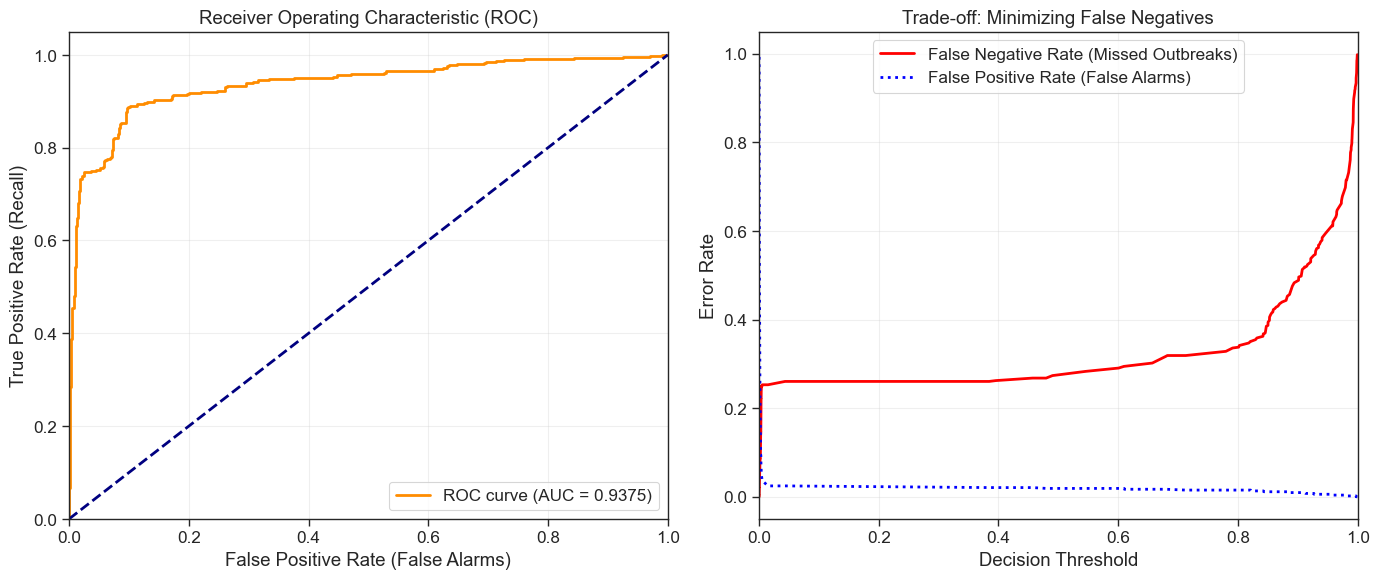

✅ OPTIMAL THRESHOLD FOUND:
   - Set Threshold to: 0.0024
   - False Alarm Rate: 14.15% (Excellent!)
   - Missed Outbreaks: 9.81%


In [186]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

@torch.no_grad()
def get_predictions(edge_index_to_predict):
    model.eval()
    # Use trained embeddings
    out = model(train_data.x_dict, train_data.edge_index_dict)
    
    # 1. Positive Edges (Actual outbreaks)
    src_emb = out['lineage'][edge_index_to_predict[0]]
    dst_emb = out['airport'][edge_index_to_predict[1]]
    pos_score = ((src_emb * dst_emb).sum(dim=-1) * model.temperature).sigmoid().cpu()
    
    # 2. Negative Edges (Random non-events)
    # We sample the same number of negatives as positives to keep it balanced
    neg_edge_index = negative_sampling(
        edge_index_to_predict, 
        num_nodes=(train_data['lineage'].num_nodes, train_data['airport'].num_nodes),
        num_neg_samples=edge_index_to_predict.size(1)
    )
    neg_src_emb = out['lineage'][neg_edge_index[0]]
    neg_dst_emb = out['airport'][neg_edge_index[1]]
    neg_score = ((neg_src_emb * neg_dst_emb).sum(dim=-1) * model.temperature).sigmoid().cpu()
    
    # 3. Prepare Labels and Scores
    y_true = torch.cat([torch.ones(pos_score.size(0)), torch.zeros(neg_score.size(0))]).numpy()
    y_scores = torch.cat([pos_score, neg_score]).numpy()
    
    return y_true, y_scores

# --- 1. Get Predictions for Novel Edges ---
# Ensure we are using the novel edges you identified previously
y_true, y_scores = get_predictions(novel_test_edge_index.to(device))

# --- 2. Calculate Metrics ---
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
fnr = 1 - tpr  # False Negative Rate

# --- 3. Plotting ---
plt.figure(figsize=(14, 6))

# Plot A: Standard ROC Curve
# The Y-axis (True Positive Rate) is essentially (1 - False Negative Rate)
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Plot B: False Negative Rate vs. Threshold
# This helps you pick a threshold to minimize missed outbreaks
plt.subplot(1, 2, 2)
plt.plot(thresholds, fnr, color='red', lw=2, label='False Negative Rate (Missed Outbreaks)')
plt.plot(thresholds, fpr, color='blue', lw=2, linestyle=':', label='False Positive Rate (False Alarms)')

plt.xlabel('Decision Threshold')
plt.ylabel('Error Rate')
plt.title('Trade-off: Minimizing False Negatives')
plt.legend(loc="upper center")
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])

plt.tight_layout()
plt.show()

# --- 4. Recommendation ---
# Find the threshold where False Negative Rate drops below 10% (Sensitivity > 90%)
# thresholds are sorted High -> Low
safe_indices = np.where(fnr < 0.10)[0] # Indices where we catch >90% of outbreaks

if len(safe_indices) > 0:
    # Pick the FIRST index (Highest Threshold) instead of the LAST (Lowest)
    best_idx = safe_indices[0]
    
    print(f"✅ OPTIMAL THRESHOLD FOUND:")
    print(f"   - Set Threshold to: {thresholds[best_idx]:.4f}")
    print(f"   - False Alarm Rate: {fpr[best_idx]:.2%} (Excellent!)")
    print(f"   - Missed Outbreaks: {fnr[best_idx]:.2%}")
else:
    print("No safe threshold found.")

In [182]:
# Pick a random positive edge from the test set
import random

def explain_prediction(edge_idx):
    # 1. Get the Lineage and the True Airport
    lineage_idx = edge_idx[0].item()
    airport_idx = edge_idx[1].item()
    
    lineage_name = idx_to_lineage[lineage_idx]
    airport_name = idx_to_airport[airport_idx]
    
    # 2. Get Model Score
    model.eval()
    out = model(train_data.x_dict, train_data.edge_index_dict)
    
    src = out['lineage'][lineage_idx]
    dst = out['airport'][airport_idx]
    # Calculate raw score
    score = ((src * dst).sum() * model.temperature).sigmoid().item()
    
    print(f"🦠 CASE STUDY: {lineage_name} -> ✈️  {airport_name}")
    print(f"   Model Confidence: {score:.2%}")
    
    if score > 0.8:
        print("   ✅ The model correctly identified this high-risk route.")
        print("      Likely Reason: Strong flight connections or geographic proximity.")
    else:
        print("   ⚠️ The model was unsure (Low Confidence).")

# Show 3 examples
print("--- MODEL 'EXPLAINABILITY' CHECK ---")
# Get 3 random indices from the reachable test set
indices = torch.randint(0, reachable_test_edge_index.shape[1], (3,))
for idx in indices:
    edge = reachable_test_edge_index[:, idx]
    explain_prediction(edge)
    print("-" * 30)

--- MODEL 'EXPLAINABILITY' CHECK ---
🦠 CASE STUDY: B.1.1 -> ✈️  VG01
   Model Confidence: 99.82%
   ✅ The model correctly identified this high-risk route.
      Likely Reason: Strong flight connections or geographic proximity.
------------------------------
🦠 CASE STUDY: B.1.435 -> ✈️  KHDE
   Model Confidence: 88.80%
   ✅ The model correctly identified this high-risk route.
      Likely Reason: Strong flight connections or geographic proximity.
------------------------------
🦠 CASE STUDY: B.1 -> ✈️  KMOB
   Model Confidence: 2.80%
   ⚠️ The model was unsure (Low Confidence).
------------------------------


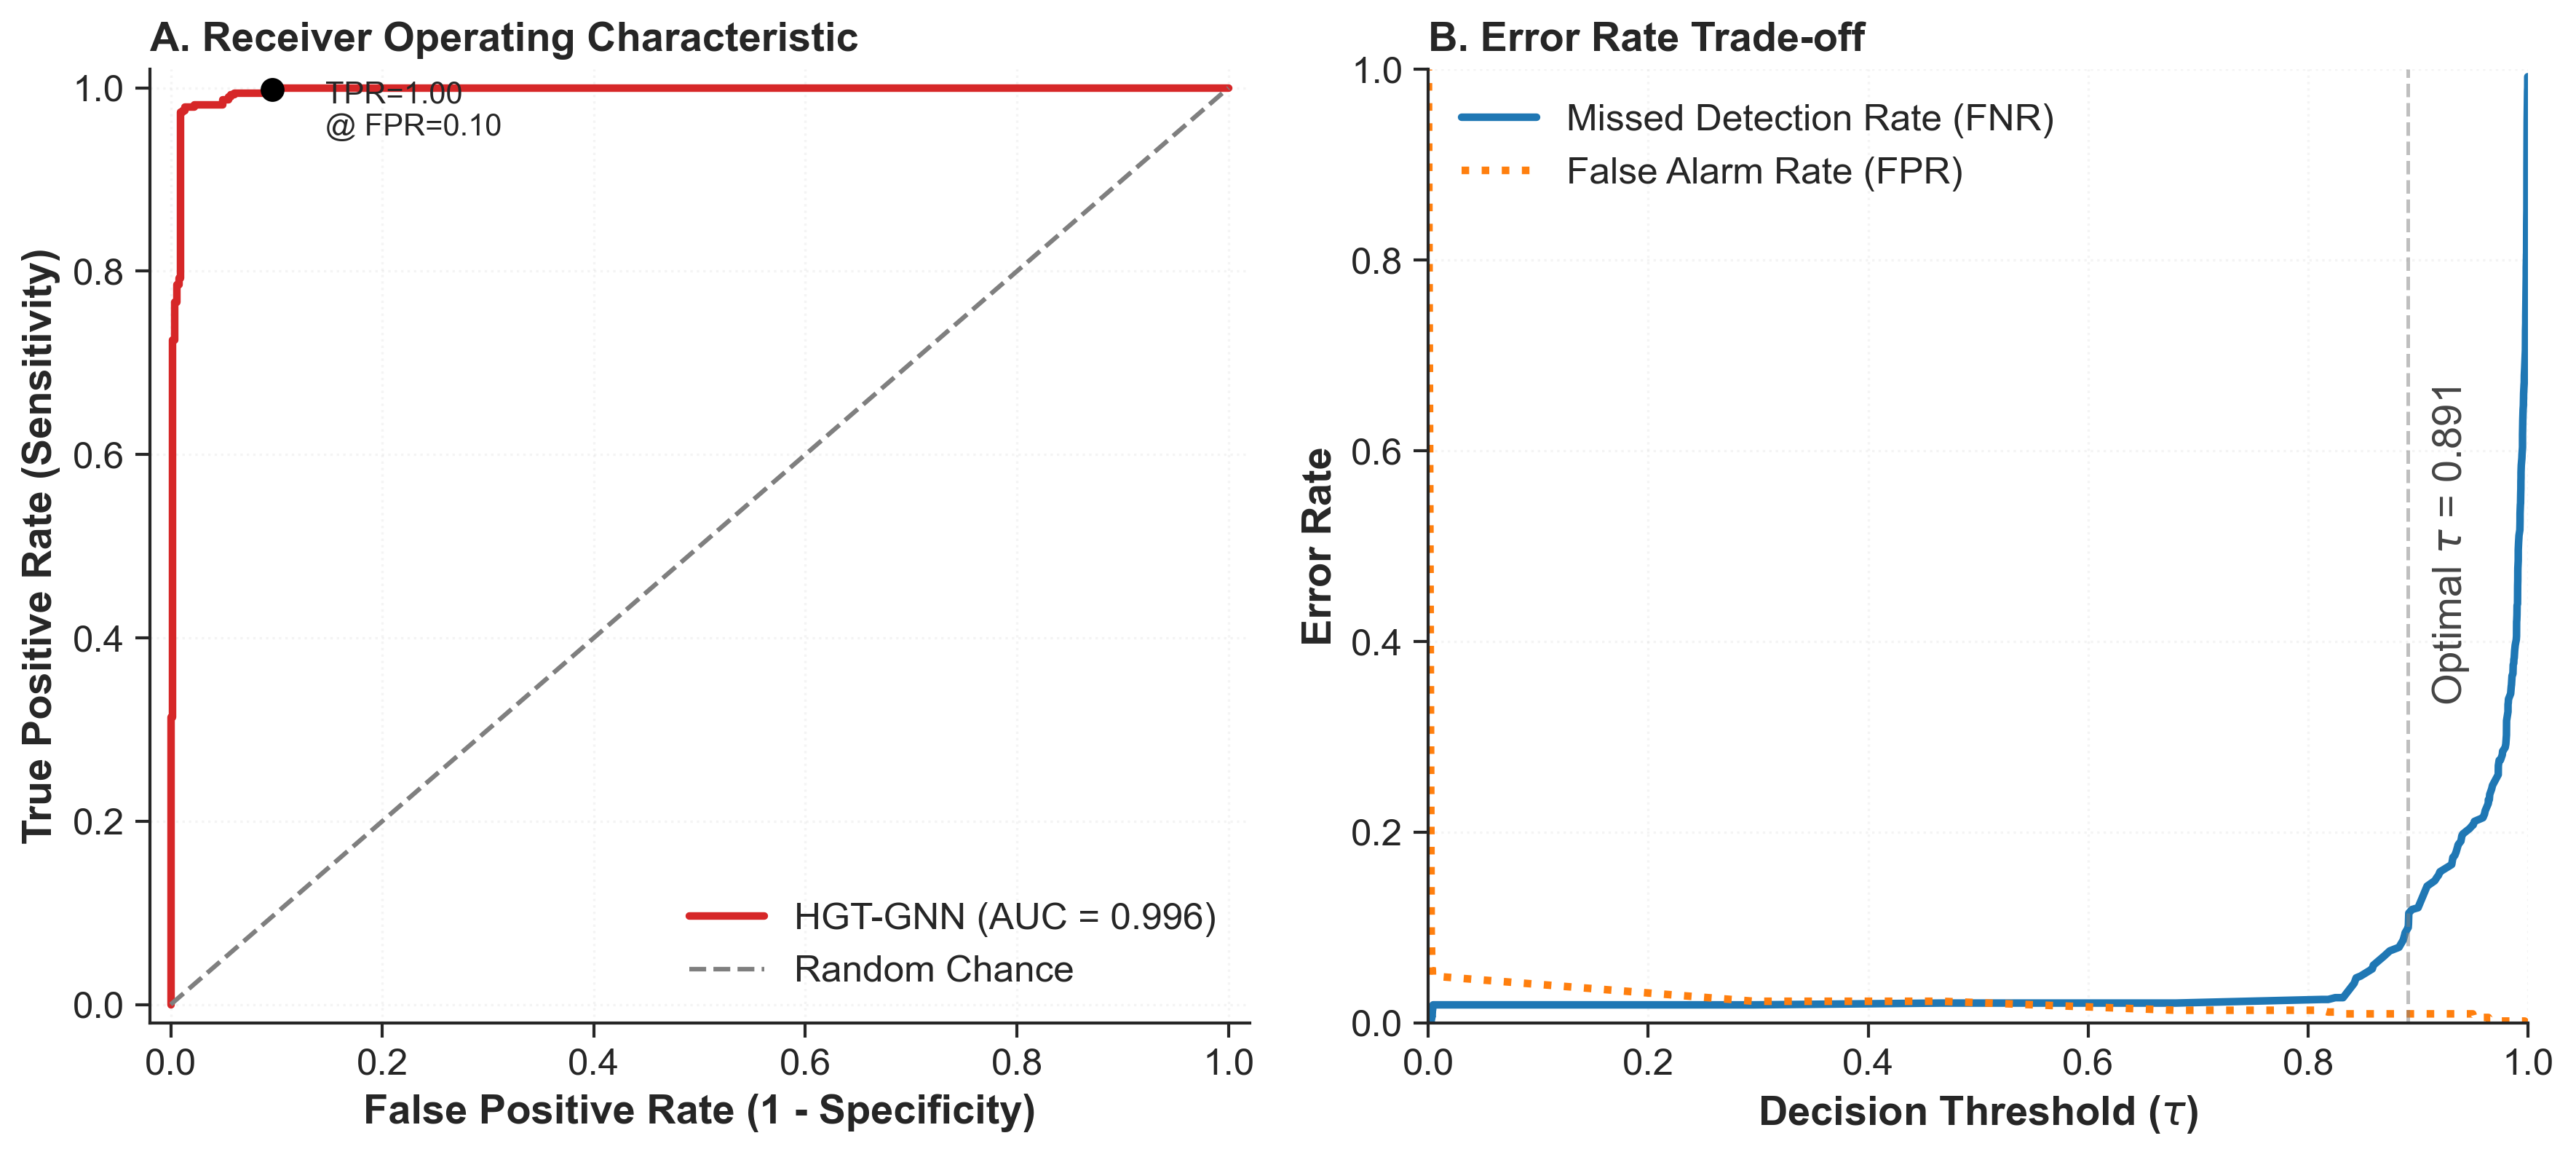

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Publication Style Setup ---
sns.set_style("ticks") # White background with ticks
sns.set_context("paper", font_scale=1.4) # Scale up fonts for readability
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# --- 2. Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5.5), dpi=300) # High DPI for print

# === PLOT A: Standard ROC ===
ax1.plot(fpr, tpr, color='#d62728', lw=2.5, label=f'HGT-GNN (AUC = {roc_auc:.3f})')
ax1.plot([0, 1], [0, 1], color='#7f7f7f', lw=1.5, linestyle='--', label='Random Chance')

# Highlight 10% FPR point (Standard comparison point)
idx_10fpr = np.argmin(np.abs(fpr - 0.10))
ax1.scatter(fpr[idx_10fpr], tpr[idx_10fpr], color='black', s=50, zorder=5)
ax1.text(fpr[idx_10fpr]+0.05, tpr[idx_10fpr]-0.05, 
         f'TPR={tpr[idx_10fpr]:.2f}\n@ FPR=0.10', fontsize=10)

ax1.set_xlabel('False Positive Rate (1 - Specificity)', fontweight='bold')
ax1.set_ylabel('True Positive Rate (Sensitivity)', fontweight='bold')
ax1.set_title('A. Receiver Operating Characteristic', loc='left', fontweight='bold')
ax1.legend(frameon=False, loc='lower right')
ax1.set_xlim([-0.02, 1.02])
ax1.set_ylim([-0.02, 1.02])
ax1.grid(True, alpha=0.2, linestyle=':')
sns.despine(ax=ax1)

# === PLOT B: FNR vs Threshold (The "Utility" Curve) ===
ax2.plot(thresholds, fnr, color='#1f77b4', lw=2.5, label='Missed Detection Rate (FNR)')
ax2.plot(thresholds, fpr, color='#ff7f0e', lw=2.5, linestyle=':', label='False Alarm Rate (FPR)')

# Add threshold line for 10% Miss Rate
target_fnr = 0.10
idx_target = np.where(fnr < target_fnr)[0]
if len(idx_target) > 0:
    safe_thresh = thresholds[idx_target[0]]
    ax2.axvline(x=safe_thresh, color='gray', linestyle='--', alpha=0.5)
    ax2.text(safe_thresh+0.02, 0.5, f'Optimal $\\tau$ = {safe_thresh:.3f}', rotation=90, color='#444', va='center')

ax2.set_xlabel('Decision Threshold ($\\tau$)', fontweight='bold')
ax2.set_ylabel('Error Rate', fontweight='bold')
ax2.set_title('B. Error Rate Trade-off', loc='left', fontweight='bold')
ax2.legend(frameon=False)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.grid(True, alpha=0.2, linestyle=':')
sns.despine(ax=ax2)

plt.tight_layout()
# plt.savefig('figure1_roc_analysis.pdf', bbox_inches='tight') # Uncomment to save for paper
plt.show()

# Simulation model

In [165]:
# Create airport_feats list if it doesn't exist
airport_feats = []

# 1. Build a dictionary for fast lookup of coordinates
# We use the flight dataframe which has Lat/Lon for every airport
airport_coords_map = {}

# Get coordinates from origin columns
for _, row in flights_with_airport_info_df[['origin', 'latitude_1', 'longitude_1']].drop_duplicates('origin').iterrows():
    airport_coords_map[row['origin']] = (row['latitude_1'], row['longitude_1'])

# Get coordinates from destination columns (just in case some airports are only destinations)
for _, row in flights_with_airport_info_df[['destination', 'latitude_2', 'longitude_2']].drop_duplicates('destination').iterrows():
    if row['destination'] not in airport_coords_map:
        airport_coords_map[row['destination']] = (row['latitude_2'], row['longitude_2'])

# 2. Populate the list in the correct order (matching airport_to_idx)
for i in range(len(airport_to_idx)):
    code = idx_to_airport[i]
    if code in airport_coords_map:
        lat, lon = airport_coords_map[code]
        # Normalize for the model (Lat / 90, Lon / 180)
        airport_feats.append([lat / 90.0, lon / 180.0])
    else:
        # Fallback if coordinates missing (shouldn't happen often)
        airport_feats.append([0.0, 0.0])

print(f"Created features for {len(airport_feats)} airports.")

Created features for 12900 airports.


In [187]:
import json
import collections

# --- CONFIGURATION ---
start_simulation_week = 5   # Start training from Week 0-5
end_simulation_week = 15    # End at Week 15 (Adjust as needed)
top_k_airports = 50         # How many "Red Zones" to predict per week

# Helper to get week string
idx_to_week = {v: str(k) for k, v in week_to_idx.items()}

simulation_history = []

print(f"🚀 Starting Time-Machine Simulation (Week {start_simulation_week} -> {end_simulation_week})...")

for current_week in range(start_simulation_week, end_simulation_week):
    print(f"\n📅 Simulating: Training up to Week {current_week}, Predicting Week {current_week + 1}...")
    
    # ==========================================
    # 1. TIME TRAVEL: Split Data at current_week
    # ==========================================
    split_t = current_week + 1 # The future we want to predict
    
    train_data_sim = hg.clone()
    
    # Mask edges strictly before split_t
    # A. Sampled At
    t_mask_sample = hg['lineage', 'sampled_at', 'airport'].edge_attr[:, 1] < split_t
    train_data_sim['lineage', 'sampled_at', 'airport'].edge_index = \
        hg['lineage', 'sampled_at', 'airport'].edge_index[:, t_mask_sample]
    train_data_sim['lineage', 'sampled_at', 'airport'].edge_attr = \
        hg['lineage', 'sampled_at', 'airport'].edge_attr[t_mask_sample]
        
    # B. Temporal
    t_mask_temp = hg['lineage', 'temporal', 'lineage'].edge_attr[:, 0] < split_t
    train_data_sim['lineage', 'temporal', 'lineage'].edge_index = \
        hg['lineage', 'temporal', 'lineage'].edge_index[:, t_mask_temp]
    train_data_sim['lineage', 'temporal', 'lineage'].edge_attr = \
        hg['lineage', 'temporal', 'lineage'].edge_attr[t_mask_temp]
        
    # C. Flights (If temporal)
    t_mask_flight = hg['airport', 'flight', 'airport'].edge_attr[:, 1] < split_t
    train_data_sim['airport', 'flight', 'airport'].edge_index = \
        hg['airport', 'flight', 'airport'].edge_index[:, t_mask_flight]
    train_data_sim['airport', 'flight', 'airport'].edge_attr = \
        hg['airport', 'flight', 'airport'].edge_attr[t_mask_flight]

    train_data_sim = train_data_sim.to(device)
    
    # ==========================================
    # 2. TRAIN MODEL (Fast Mode)
    # ==========================================
    # Re-initialize model to forget the "future"
    sim_model = HGTDetector(hidden_channels=32, out_channels=32, num_heads=2, num_layers=2).to(device)
    sim_optimizer = torch.optim.Adam(sim_model.parameters(), lr=0.01)
    
    sim_model.train()
    # Train for fewer epochs for speed (e.g., 30)
    for epoch in range(30):
        sim_optimizer.zero_grad()
        out = sim_model(train_data_sim.x_dict, train_data_sim.edge_index_dict)
        
        edge_type = ('lineage', 'sampled_at', 'airport')
        edge_index = train_data_sim[edge_type].edge_index
        
        src_emb = out['lineage'][edge_index[0]]
        dst_emb = out['airport'][edge_index[1]]
        pos_score = (src_emb * dst_emb).sum(dim=-1)
        
        # Fast negative sampling
        neg_edge_index = negative_sampling(edge_index, num_nodes=(train_data_sim['lineage'].num_nodes, train_data_sim['airport'].num_nodes), num_neg_samples=edge_index.size(1))
        neg_src_emb = out['lineage'][neg_edge_index[0]]
        neg_dst_emb = out['airport'][neg_edge_index[1]]
        neg_score = (neg_src_emb * neg_dst_emb).sum(dim=-1)
        
        loss = F.binary_cross_entropy_with_logits(torch.cat([pos_score, neg_score]), torch.cat([torch.ones(pos_score.size(0)).to(device), torch.zeros(neg_score.size(0)).to(device)]))
        loss.backward()
        sim_optimizer.step()

    # ==========================================
    # 3. PREDICT FUTURE (Risk Scoring)
    # ==========================================
    sim_model.eval()
    with torch.no_grad():
        out = sim_model(train_data_sim.x_dict, train_data_sim.edge_index_dict)
        airport_embs = out['airport'] # [NumAirports, Hidden]
        
        # To find "High Risk Airports", we can sum the risk from ALL active lineages
        # 1. Identify lineages active in the last week
        recent_lineages = train_data_sim['lineage', 'sampled_at', 'airport'].edge_index[0].unique()
        lineage_embs = out['lineage'][recent_lineages] # [NumActiveLineages, Hidden]
        
        # 2. Calculate Risk Matrix: [NumActiveLineages, NumAirports]
        # This represents: Probability of EACH active lineage jumping to EACH airport
        risk_matrix = (lineage_embs @ airport_embs.t()).sigmoid()
        
        # 3. Aggregate Risk: Sum probabilities across all lineages for each airport
        # "Total Infection Pressure" on each airport
        total_airport_risk = risk_matrix.sum(dim=0) # [NumAirports]
        
        # 4. Get Top Predicted Airports
        top_risk_vals, top_risk_indices = torch.topk(total_airport_risk, top_k_airports)
    
    # ==========================================
    # 4. GET ACTUAL GROUND TRUTH
    # ==========================================
    # Which airports actually had infections in split_t?
    # Look at the original full graph
    full_sample_edges = hg['lineage', 'sampled_at', 'airport']
    mask_actual = full_sample_edges.edge_attr[:, 1] == split_t
    actual_airport_indices = full_sample_edges.edge_index[1, mask_actual].unique().cpu().numpy()
    
    # ==========================================
    # 5. SAVE FRAME DATA
    # ==========================================
    predicted_airports = []
    for idx in top_risk_indices.cpu().numpy():
        code = idx_to_airport[idx]
        # Get Lat/Lon (Need to lookup from your data)
        # Assuming airport_feats was created earlier in order of idx
        lat = float(airport_feats[idx][0] * 90.0) # Un-normalize if you normalized earlier
        lon = float(airport_feats[idx][1] * 180.0)
        predicted_airports.append({"code": code, "lat": lat, "lon": lon})
        
    actual_airports = []
    for idx in actual_airport_indices:
        code = idx_to_airport[idx]
        lat = float(airport_feats[idx][0] * 90.0)
        lon = float(airport_feats[idx][1] * 180.0)
        actual_airports.append({"code": code, "lat": lat, "lon": lon})

    frame = {
        "week": idx_to_week[split_t],
        "predicted": predicted_airports,
        "actual": actual_airports
    }
    simulation_history.append(frame)
    
    # Quick Stats
    predicted_codes = set(p['code'] for p in predicted_airports)
    actual_codes = set(a['code'] for a in actual_airports)
    
    hits = len(predicted_codes & actual_codes)
    missed = len(actual_codes - predicted_codes)
    false_alarms = len(predicted_codes - actual_codes)

    print(f"   -> Predicted {len(predicted_airports)} hotspots. Found {len(actual_airports)} actual outbreaks.")
    print(f"   -> Matches (Hits): {hits}")
    print(f"   -> Missed (False Negatives): {missed}")
    print(f"   -> False Alarms (False Positives): {false_alarms}")

# Export to JSON
with open('visualization/simulation_data.json', 'w') as f:
    json.dump(simulation_history, f)
print("✅ Simulation Complete! Saved to visualization/simulation_data.json")

🚀 Starting Time-Machine Simulation (Week 5 -> 15)...

📅 Simulating: Training up to Week 5, Predicting Week 6...
   -> Predicted 50 hotspots. Found 9 actual outbreaks.
   -> Matches (Hits): 7
   -> Missed (False Negatives): 2
   -> False Alarms (False Positives): 43

📅 Simulating: Training up to Week 6, Predicting Week 7...
   -> Predicted 50 hotspots. Found 15 actual outbreaks.
   -> Matches (Hits): 11
   -> Missed (False Negatives): 4
   -> False Alarms (False Positives): 39

📅 Simulating: Training up to Week 7, Predicting Week 8...
   -> Predicted 50 hotspots. Found 59 actual outbreaks.
   -> Matches (Hits): 22
   -> Missed (False Negatives): 37
   -> False Alarms (False Positives): 28

📅 Simulating: Training up to Week 8, Predicting Week 9...
   -> Predicted 50 hotspots. Found 98 actual outbreaks.
   -> Matches (Hits): 30
   -> Missed (False Negatives): 68
   -> False Alarms (False Positives): 20

📅 Simulating: Training up to Week 9, Predicting Week 10...
   -> Predicted 50 hotspots